In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [109]:
df= pd.read_excel("LI_BFSI_01.xls")

In [110]:
df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [111]:
df.tail()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
4515,7004515,3953,4.0,8.0,Agent,Small Business,Graduate,Male,4,Senior Manager,2.0,Single,26355.0,0,2.0,636473.0,West,Yearly,9,1.0
4516,7004516,2939,9.0,9.0,Agent,Salaried,Under Graduate,Female,2,Executive,2.0,Married,20991.0,0,3.0,296813.0,North,Yearly,1,3.0
4517,7004517,3792,23.0,23.0,Agent,Salaried,Engineer,Female,5,AVP,5.0,Single,NaN,0,2.0,667371.0,North,Half Yearly,4,1.0
4518,7004518,4816,10.0,10.0,Online,Small Business,Graduate,Female,4,Executive,2.0,Single,20068.0,0,6.0,943999.0,West,Half Yearly,1,5.0
4519,7004519,4764,14.0,10.0,Agent,Salaried,Under Graduate,Female,5,Manager,2.0,Married,23820.0,0,3.0,700308.0,North,Half Yearly,1,3.0


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [113]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustID,4520.0,7.002260e+06,1304.955938,7000000.0,7001129.75,7002259.5,7003389.25,7004519.0
AgentBonus,4520.0,4.077838e+03,1403.321711,1605.0,3027.75,3911.5,4867.25,9608.0
Age,4251.0,1.449471e+01,9.037629,2.0,7.00,13.0,20.00,58.0
CustTenure,4294.0,1.446903e+01,8.963671,2.0,7.00,13.0,20.00,57.0
ExistingProdType,4520.0,3.688938e+00,1.015769,1.0,3.00,4.0,4.00,6.0
NumberOfPolicy,4475.0,3.565363e+00,1.455926,1.0,2.00,4.0,5.00,6.0
MonthlyIncome,4284.0,2.289031e+04,4885.600757,16009.0,19683.50,21606.0,24725.00,38456.0
Complaint,4520.0,2.871681e-01,0.452491,0.0,0.00,0.0,1.00,1.0
ExistingPolicyTenure,4336.0,4.130074e+00,3.346386,1.0,2.00,3.0,6.00,25.0
SumAssured,4366.0,6.199997e+05,246234.822140,168536.0,439443.25,578976.5,758236.00,1838496.0


In [114]:
df.isnull().sum()

CustID                    0
AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

In [115]:
df.shape

(4520, 20)

In [116]:
df.duplicated().sum()

0

# EDA

In [117]:
categorical_columns = ['Channel', 'Occupation', 'EducationField', 'Gender', 'ExistingProdType', 'Designation', 'MaritalStatus', 'Zone', 'PaymentMethod']

numerical_columns = ['Age', 'CustTenure', 'NumberOfPolicy', 'MonthlyIncome', 'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls', 'CustCareScore']

df['Churn'] = ((df['CustCareScore'] <= 3) | (df['Complaint'] == 1)).astype(int)


In [118]:
df['Gender'] = df['Gender'].replace('Fe male', 'Female')

In [119]:
df['EducationField'] = df['EducationField'].replace('UG', 'Under Graduate')

In [120]:
df['Occupation'] = df['Occupation'].replace('Laarge Business', 'Large Business')

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


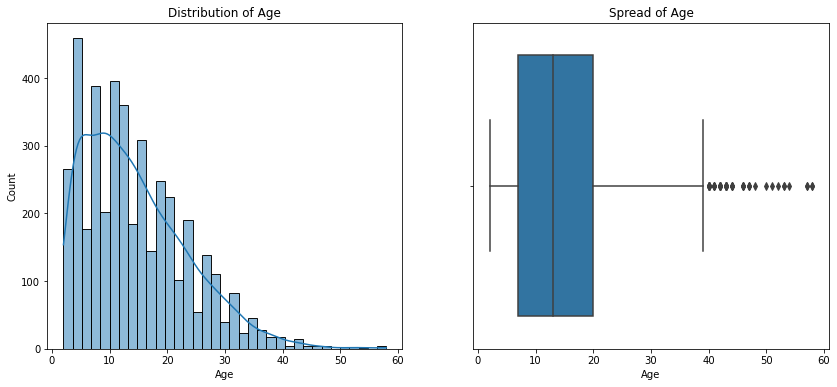

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


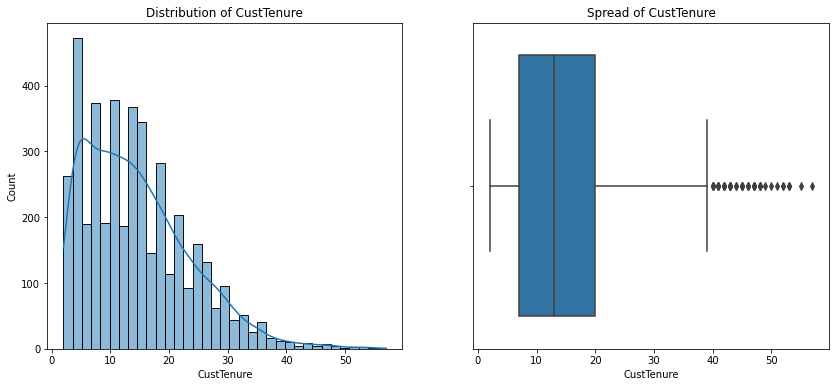

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


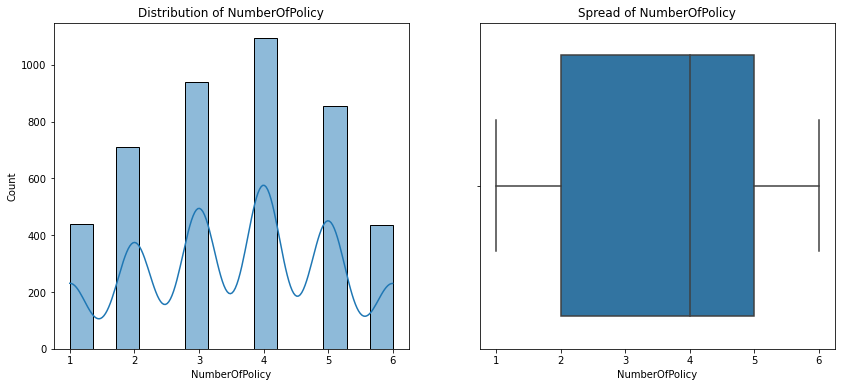

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


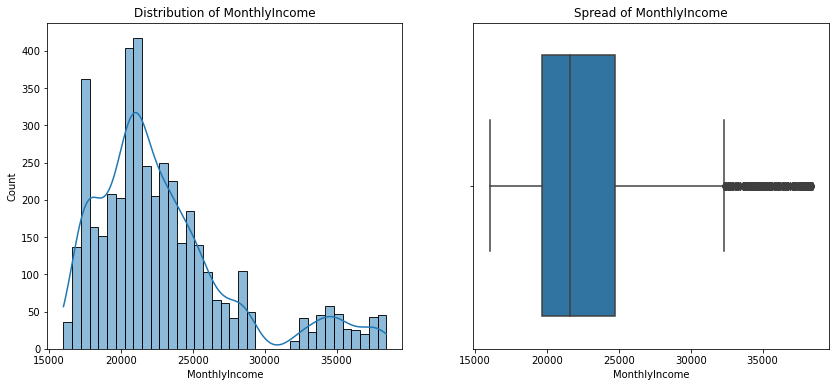

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


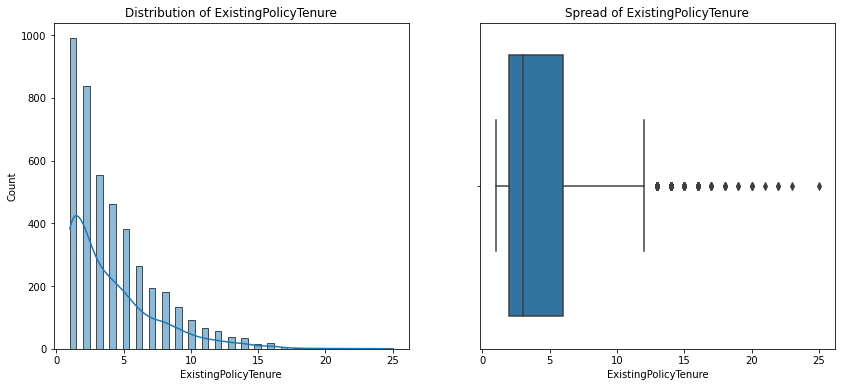

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


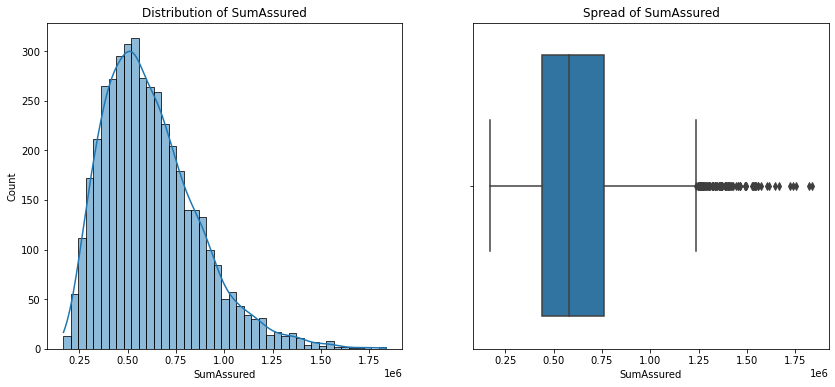

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


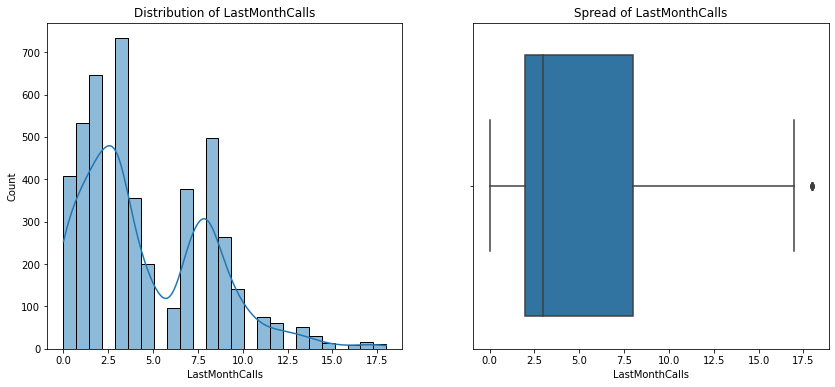

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


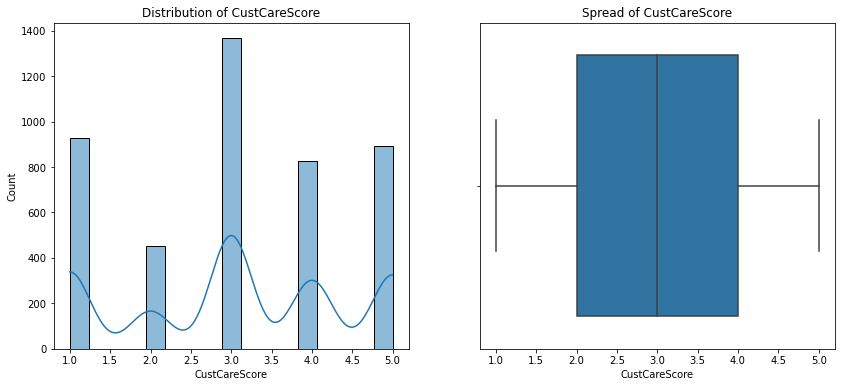

In [121]:
for col in numerical_columns:
    plt.figure(figsize=(14, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    
    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(df[col])
    plt.title(f'Spread of {col}')
    
    plt.show()

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


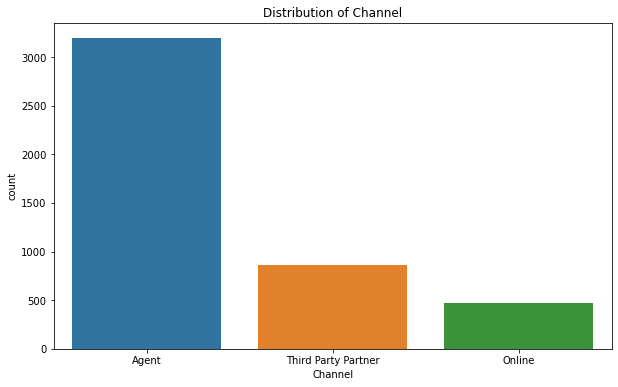

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


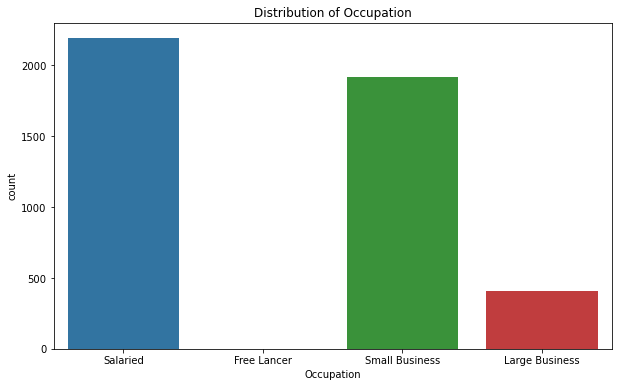

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


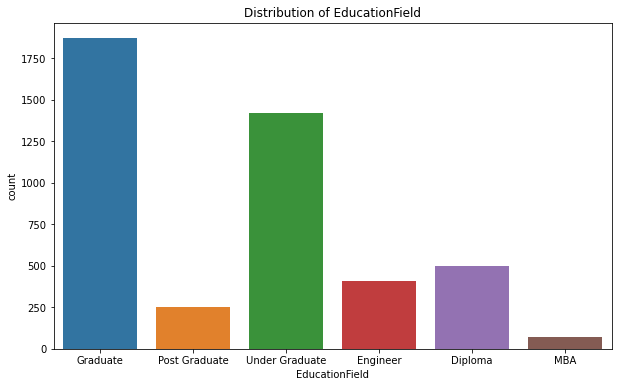

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


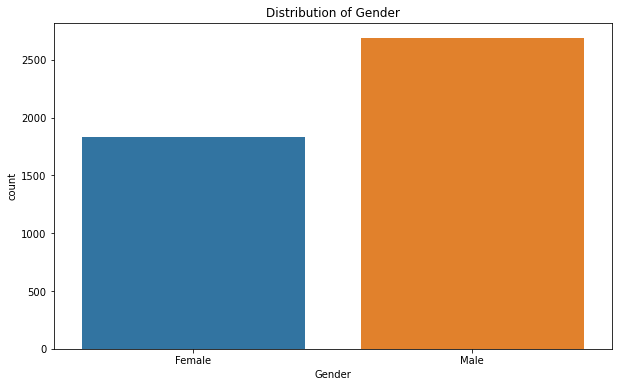

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


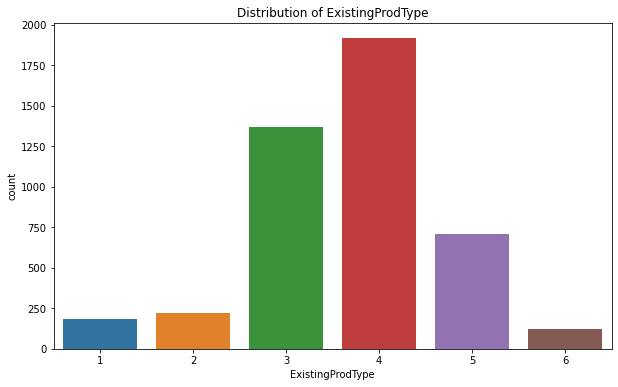

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


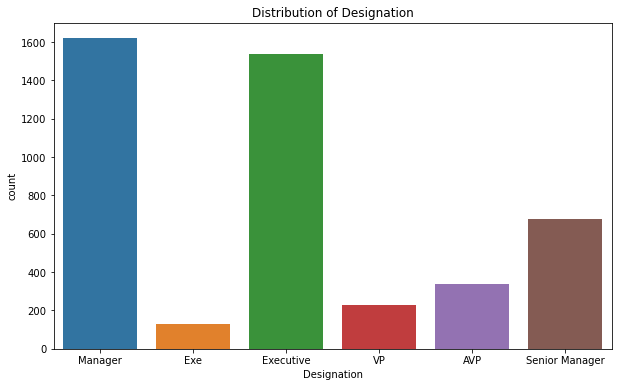

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


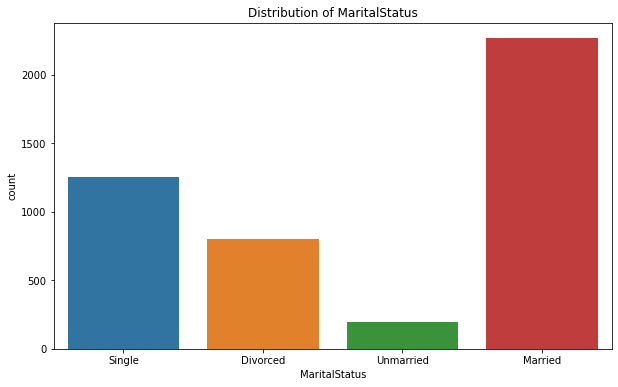

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


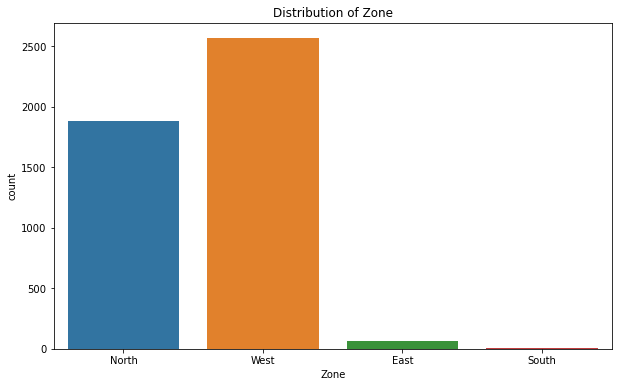

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


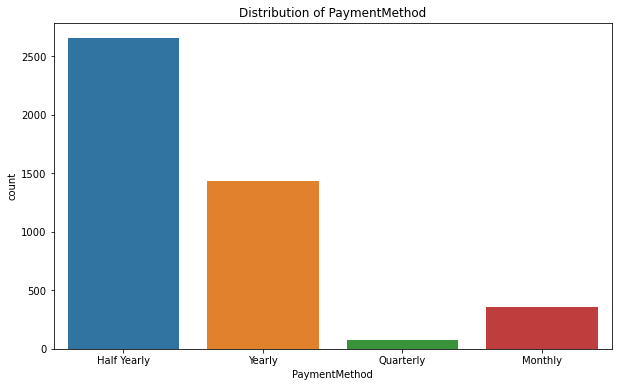

In [122]:
# Categorical Variables Analysis
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

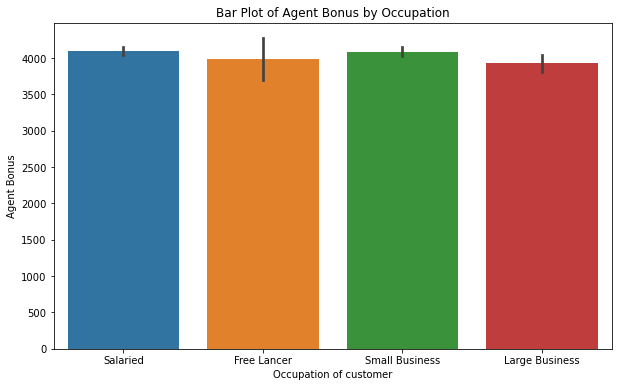

In [123]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Occupation', y='AgentBonus', data=df)
plt.title('Bar Plot of Agent Bonus by Occupation')
plt.xlabel('Occupation of customer')
plt.ylabel('Agent Bonus')
plt.show()

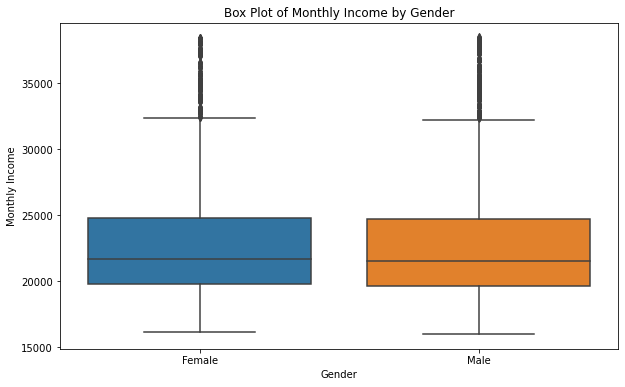

In [124]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='MonthlyIncome', data=df)
plt.title('Box Plot of Monthly Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Monthly Income')
plt.show()

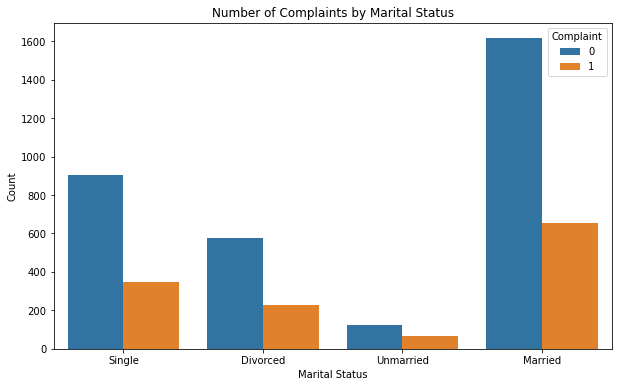

In [125]:
plt.figure(figsize=(10, 6))
sns.countplot(x='MaritalStatus', hue='Complaint', data=df)
plt.title('Number of Complaints by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

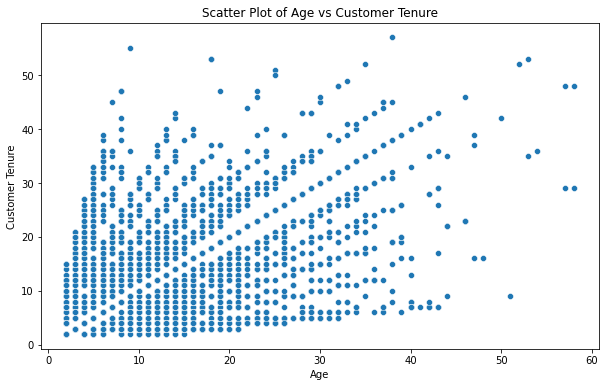

In [126]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='CustTenure', data=df)
plt.title('Scatter Plot of Age vs Customer Tenure')
plt.xlabel('Age')
plt.ylabel('Customer Tenure')
plt.show()

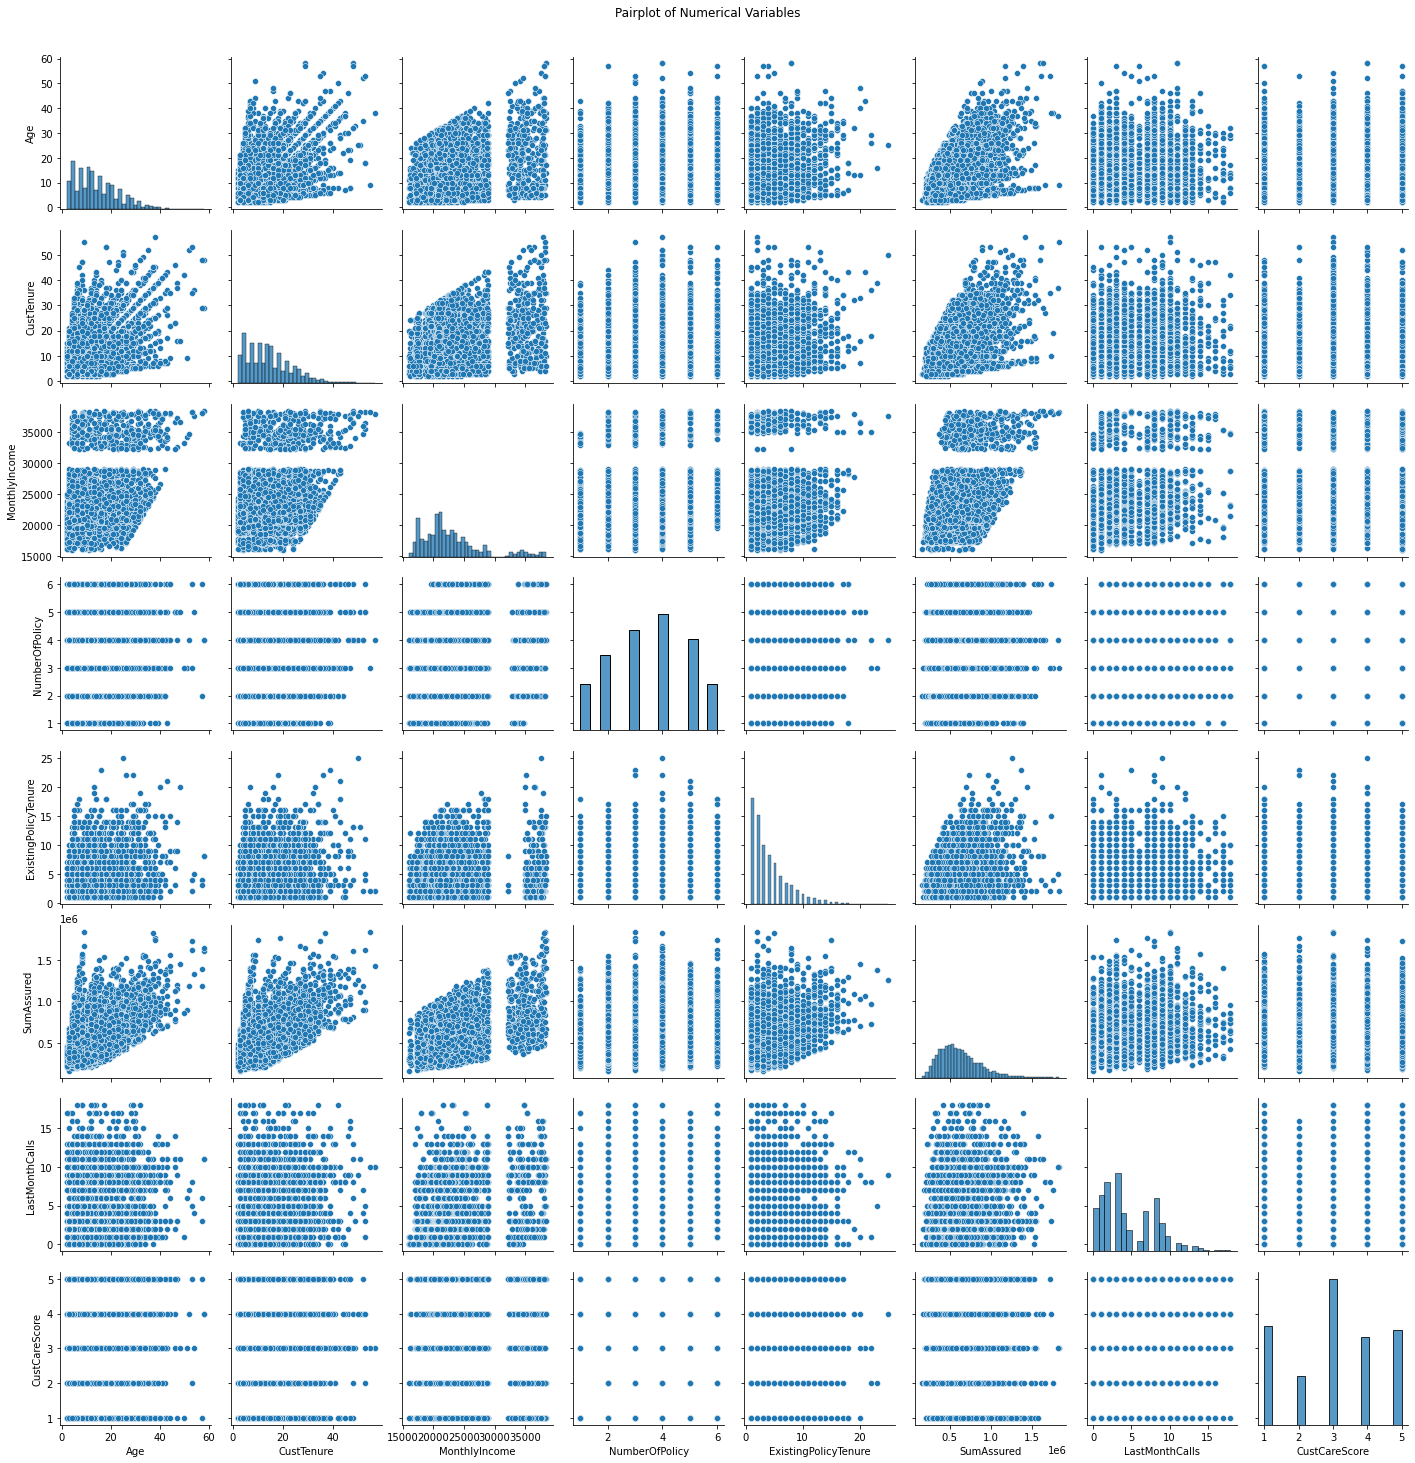

In [127]:
numerical_vars = ['Age', 'CustTenure', 'MonthlyIncome', 'NumberOfPolicy', 'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls', 'CustCareScore']
sns.pairplot(df[numerical_vars])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

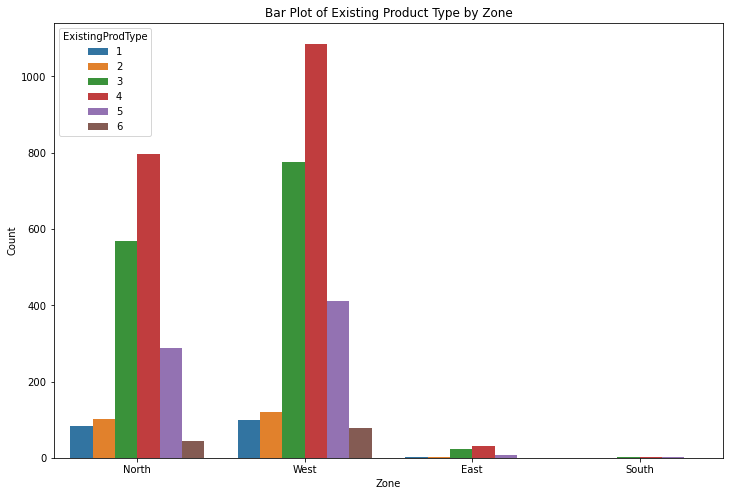

In [128]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Zone', hue='ExistingProdType', data=df)
plt.title('Bar Plot of Existing Product Type by Zone')
plt.xlabel('Zone')
plt.ylabel('Count')
plt.show()

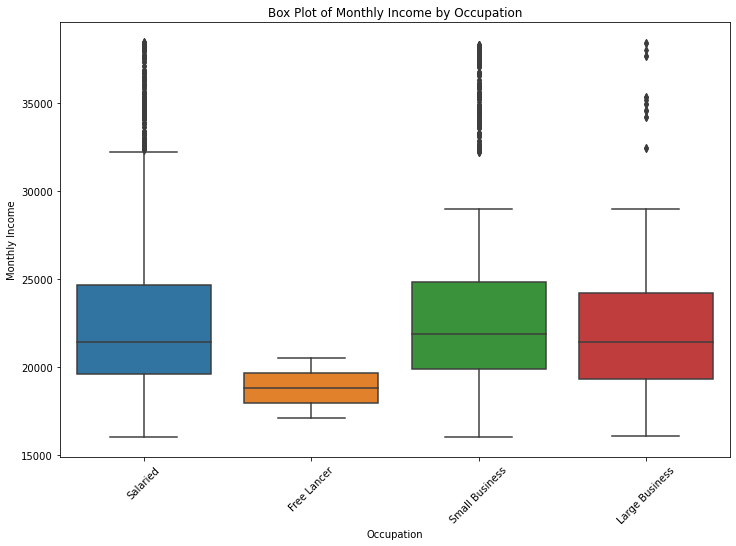

In [129]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Occupation', y='MonthlyIncome', data=df)
plt.title('Box Plot of Monthly Income by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Monthly Income')
plt.xticks(rotation=45)
plt.show()

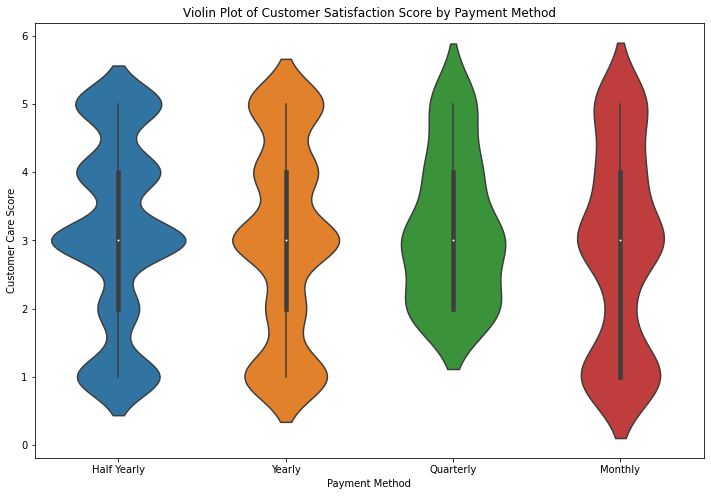

In [130]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='PaymentMethod', y='CustCareScore', data=df)
plt.title('Violin Plot of Customer Satisfaction Score by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Customer Care Score')
plt.show()

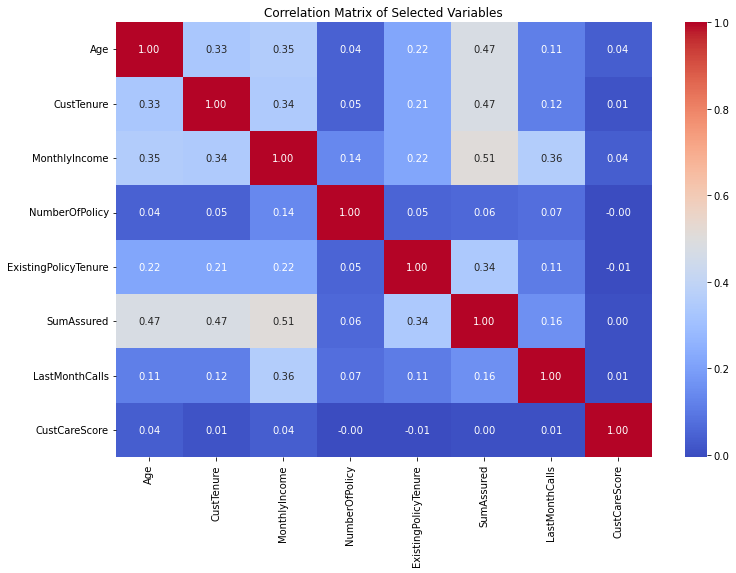

In [131]:
selected_vars = ['Age', 'CustTenure', 'MonthlyIncome', 'NumberOfPolicy', 'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls', 'CustCareScore']
correlation_matrix = df[selected_vars].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Variables')
plt.show()

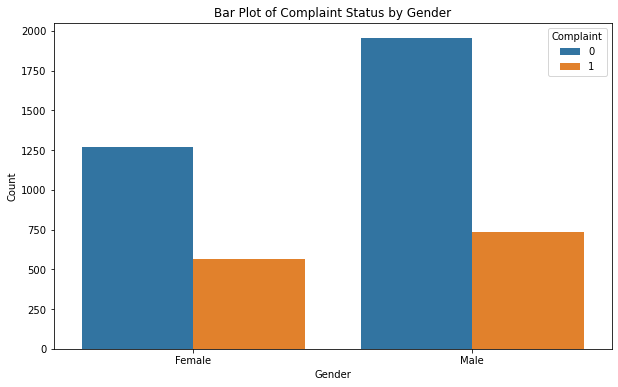

In [132]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Complaint', data=df)
plt.title('Bar Plot of Complaint Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

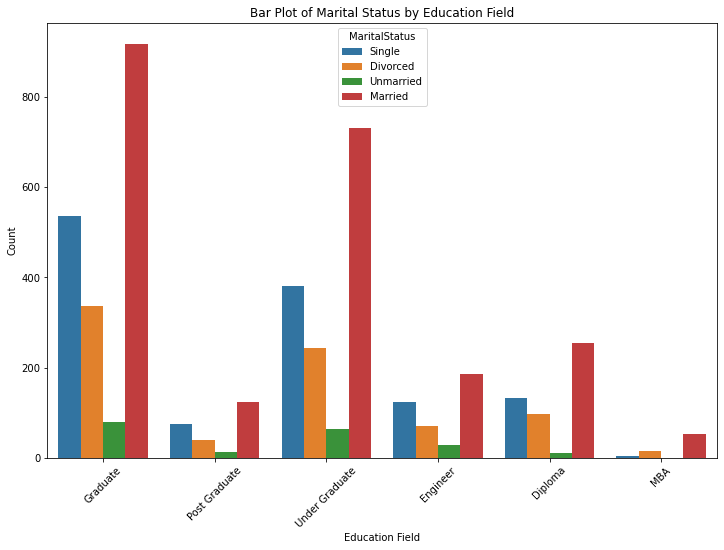

In [133]:
plt.figure(figsize=(12, 8))
sns.countplot(x='EducationField', hue='MaritalStatus', data=df)
plt.title('Bar Plot of Marital Status by Education Field')
plt.xlabel('Education Field')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Figure size 720x432 with 0 Axes>

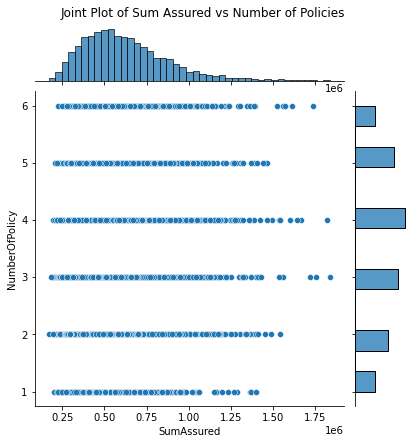

In [134]:
plt.figure(figsize=(10, 6))
sns.jointplot(x='SumAssured', y='NumberOfPolicy', data=df, kind='scatter')
plt.suptitle('Joint Plot of Sum Assured vs Number of Policies', y=1.02)
plt.xlabel('Sum Assured')
plt.ylabel('Number of Policies')
plt.show()

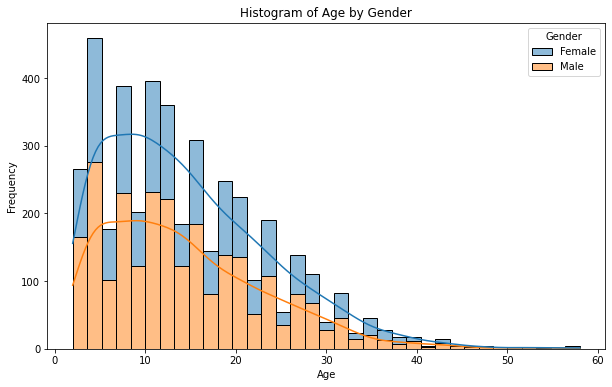

In [135]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Gender', multiple='stack', kde=True)
plt.title('Histogram of Age by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

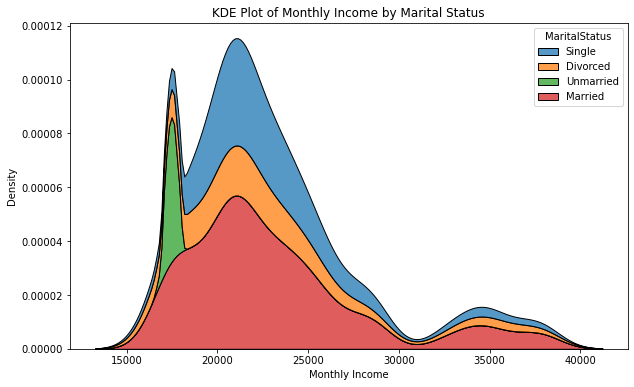

In [136]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='MonthlyIncome', hue='MaritalStatus', multiple='stack')
plt.title('KDE Plot of Monthly Income by Marital Status')
plt.xlabel('Monthly Income')
plt.ylabel('Density')
plt.show()

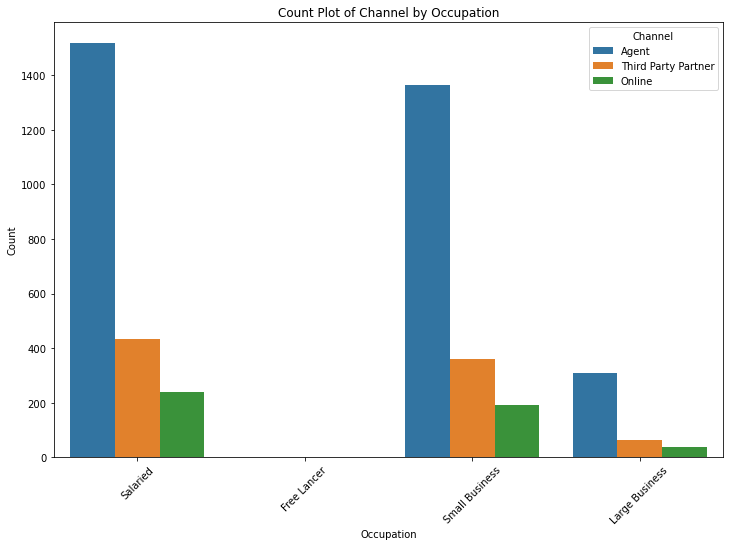

In [137]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Occupation', hue='Channel', data=df)
plt.title('Count Plot of Channel by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

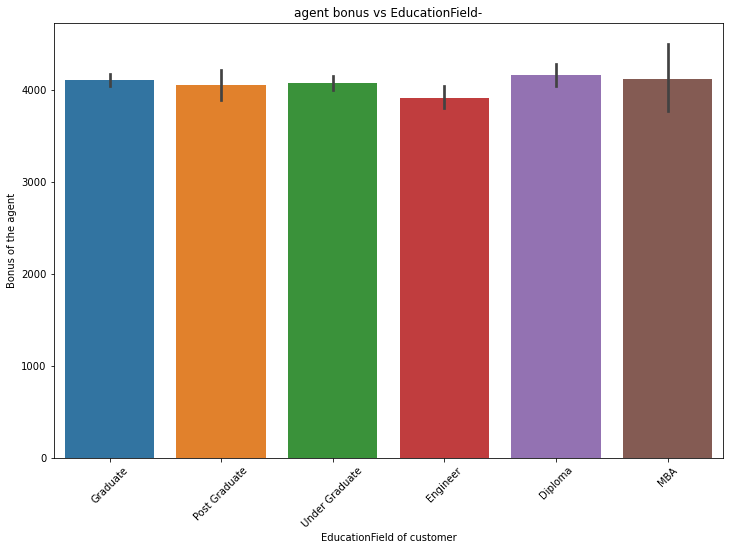

In [138]:
plt.figure(figsize=(12, 8))
sns.barplot(x='EducationField', y='AgentBonus', data=df)
plt. title('agent bonus vs EducationField-')
plt.xlabel( 'EducationField of customer') 
plt.ylabel( 'Bonus of the agent') 
plt.xticks(rotation=45)
plt.show()

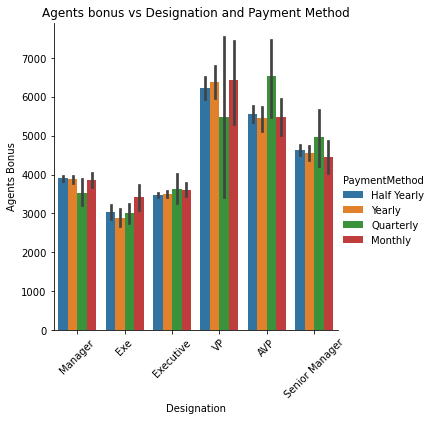

In [139]:
sns.catplot(x='Designation', y='AgentBonus', hue='PaymentMethod', kind='bar', data=df)
plt.title('Agents bonus vs Designation and Payment Method')
plt.xlabel('Designation')
plt.ylabel('Agents Bonus')
plt.xticks(rotation=45)
plt.show()

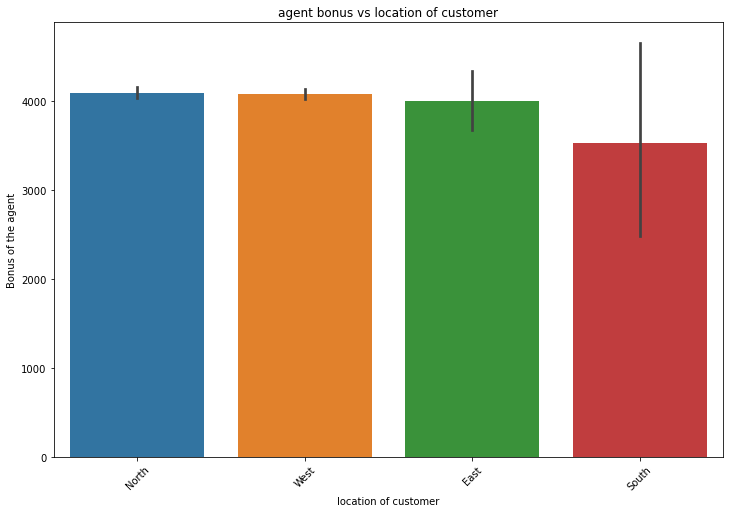

In [140]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Zone', y='AgentBonus', data=df)
plt. title('agent bonus vs location of customer')
plt.xlabel( 'location of customer') 
plt.ylabel( 'Bonus of the agent') 
plt.xticks(rotation=45)
plt.show()

In [141]:
imputer_num = SimpleImputer(strategy='mean')
df['Age'] = imputer_num.fit_transform(df[['Age']])
df['CustTenure'] = imputer_num.fit_transform(df[['CustTenure']])
df['NumberOfPolicy'] = imputer_num.fit_transform(df[['NumberOfPolicy']])
df['MonthlyIncome'] = imputer_num.fit_transform(df[['MonthlyIncome']])
df['ExistingPolicyTenure'] = imputer_num.fit_transform(df[['ExistingPolicyTenure']])
df['SumAssured'] = imputer_num.fit_transform(df[['SumAssured']])
df['CustCareScore'] = imputer_num.fit_transform(df[['CustCareScore']])

print("Missing Values after imputation:\n", df.isnull().sum())

Missing Values after imputation:
 CustID                  0
AgentBonus              0
Age                     0
CustTenure              0
Channel                 0
Occupation              0
EducationField          0
Gender                  0
ExistingProdType        0
Designation             0
NumberOfPolicy          0
MaritalStatus           0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
Zone                    0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
Churn                   0
dtype: int64


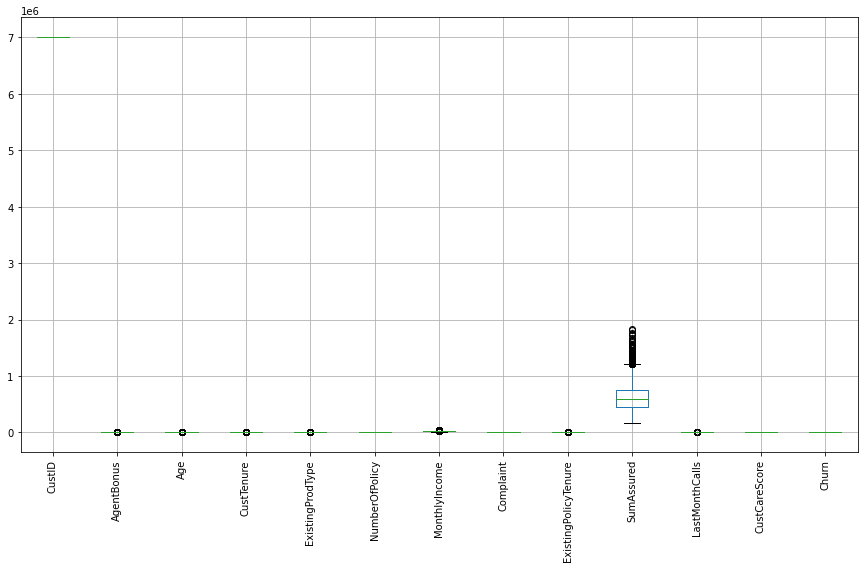

In [142]:
df.boxplot(figsize=(15,8))
plt.xticks(rotation=90)
plt.show();

In [145]:

outliers_count = {}

# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Iterate over each numeric column in the DataFrame
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_count[column] = len(outliers)

print("Number of outliers in each numeric column:")
outliers_df = pd.DataFrame([{'Column': column, 'No. of outliers': count} for column, count in outliers_count.items()])
print(outliers_df)

Number of outliers in each numeric column:
                  Column  No. of outliers
0                 CustID                0
1             AgentBonus              100
2                    Age              105
3             CustTenure               97
4       ExistingProdType              306
5         NumberOfPolicy                0
6          MonthlyIncome              384
7              Complaint                0
8   ExistingPolicyTenure              345
9             SumAssured              110
10        LastMonthCalls               12
11         CustCareScore                0
12                 Churn                0


In [147]:
def remove_outlier(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit

numeric_columns = df.select_dtypes(include=[np.number]).columns

# Iterate over each numeric column in the DataFrame
for column in numeric_columns:
    lower_limit, upper_limit = remove_outlier(df[column])
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])

# Display the first few rows of the modified DataFrame
print(df.head())

      CustID  AgentBonus   Age  CustTenure              Channel  \
0  7000000.0      4409.0  22.0    4.000000                Agent   
1  7000001.0      2214.0  11.0    2.000000  Third Party Partner   
2  7000002.0      4273.0  26.0    4.000000                Agent   
3  7000003.0      1791.0  11.0   14.469027  Third Party Partner   
4  7000004.0      2955.0   6.0   14.469027                Agent   

       Occupation  EducationField  Gender  ExistingProdType Designation  ...  \
0        Salaried        Graduate  Female               3.0     Manager  ...   
1        Salaried        Graduate    Male               4.0     Manager  ...   
2     Free Lancer   Post Graduate    Male               4.0         Exe  ...   
3        Salaried        Graduate  Female               3.0   Executive  ...   
4  Small Business  Under Graduate    Male               3.0   Executive  ...   

   MaritalStatus MonthlyIncome  Complaint  ExistingPolicyTenure  \
0         Single       20993.0        1.0        

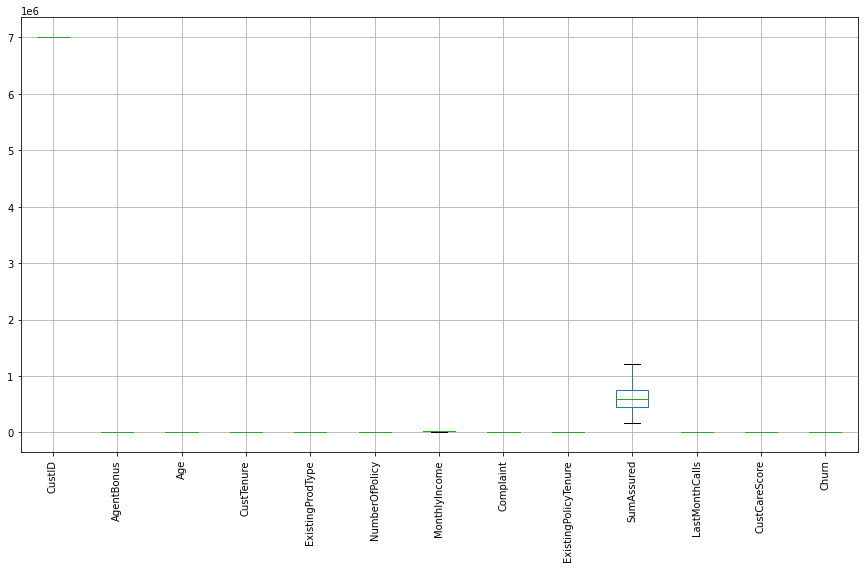

In [149]:
df.boxplot(figsize=(15,8))
plt.xticks(rotation=90)
plt.show();

Class distribution of Churn:
1.0    3253
0.0    1267
Name: Churn, dtype: int64


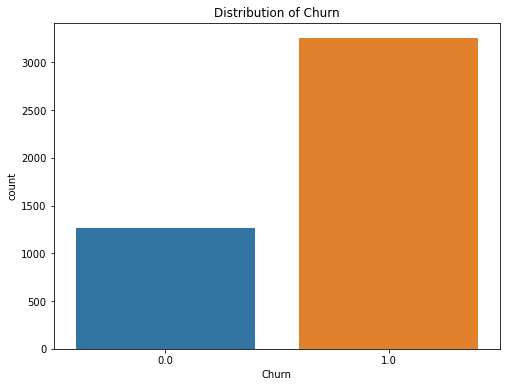

In [150]:
churn_counts = df['Churn'].value_counts()
print("Class distribution of Churn:")
print(churn_counts)

# Visualize the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

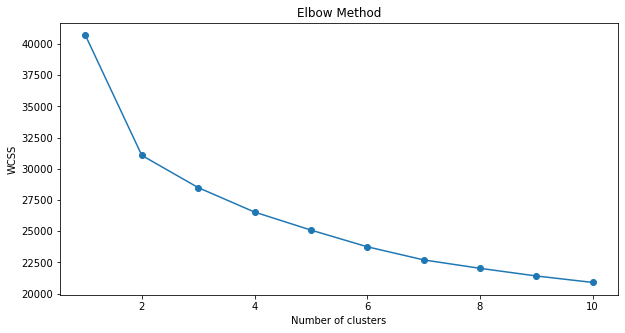

               CustID   AgentBonus        Age  CustTenure  ExistingProdType  \
Cluster                                                                       
0        7.001984e+06  3002.659309  10.070226   10.001643          3.575096   
1        7.002665e+06  6195.056022  24.461485   23.302521          3.918067   
2        7.002425e+06  4461.629501  15.377889   15.867059          3.749129   

         NumberOfPolicy  MonthlyIncome  Complaint  ExistingPolicyTenure  \
Cluster                                                                   
0              3.356046   20561.235377   0.285988              2.540370   
1              3.746201   27771.243899   0.313725              5.278067   
2              3.743701   22855.020028   0.277584              4.999863   

            SumAssured  LastMonthCalls  CustCareScore     Churn  
Cluster                                                          
0        452419.696114        3.715451       3.061985  0.721209  
1        946110.129552        

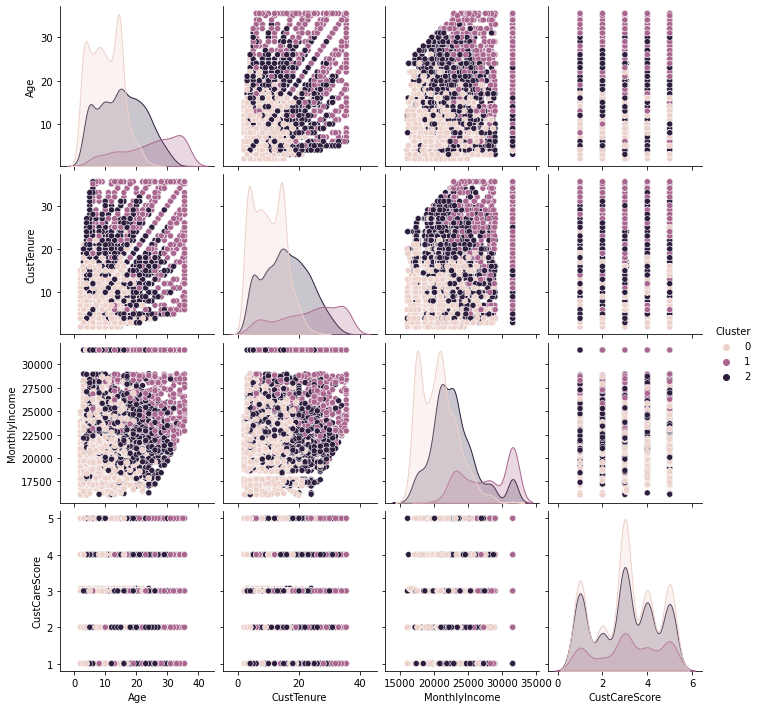

In [153]:
# Select relevant features for clustering
features = df[['AgentBonus', 'Age', 'CustTenure', 'NumberOfPolicy', 'MonthlyIncome', 'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls', 'CustCareScore']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Determine the number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the Elbow Method, choose the number of clusters
n_clusters = 3  # Example: Choose 3 clusters

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame
df['Cluster'] = clusters

# Analyze clusters
cluster_profile = df.groupby('Cluster').mean()
print(cluster_profile)

# Visualize clusters
sns.pairplot(df, hue='Cluster', vars=['Age', 'CustTenure', 'MonthlyIncome', 'CustCareScore'])
plt.show()